In [25]:
import requests          
import pylab             
from io import StringIO  
from Bio import Phylo    
import matplotlib

import random
from ete3 import Tree, TreeStyle, NodeStyle

In [5]:
# Грузим дерево по ссылке и парсим.
raw_tree = StringIO(requests.get('https://www.jasondavies.com/tree-of-life/life.txt').text)
tree1 = Phylo.read(raw_tree, "newick")   

In [6]:
# Строим дерево ASCII-артом.
Phylo.draw_ascii(tree1)

                             , Escherichia_coli_EDL933
                             |
                             | Escherichia_coli_O157_H7
                             |
                             , Escherichia_coli_O6
                             |
                             | Escherichia_coli_K12
                             |
                             , Shigella_flexneri_2a_2457T
                             |
                             | Shigella_flexneri_2a_301
                             |
                             , Salmonella_enterica
                             |
                             | Salmonella_typhi
                             |
                             | Salmonella_typhimurium
                             |
                             , Yersinia_pestis_Medievalis
                             |
                             , Yersinia_pestis_KIM
                             |
                            ,| Yersinia_pestis_CO92
                 

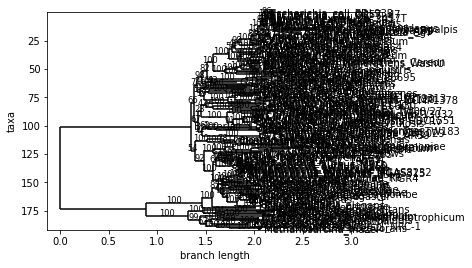

In [7]:
# Стром дерево на картинке.
Phylo.draw(tree1, do_show=False)

In [12]:
# Сохраняем построенную картинку в файлы.
matplotlib.pyplot.savefig("py_tree1_phylo.svg",  branch_labels=lambda x: x.branch_length)
matplotlib.pyplot.savefig("py_tree1_phylo.png");

/Users/saluev/miniconda3/envs/ete3/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "branch_labels" which is no longer supported as of 3.3 and will become an error two minor releases later
  


<Figure size 432x288 with 0 Axes>

In [15]:
# Сохраняем дерево в формат XML.
tree1 = tree1.as_phyloxml()
Phylo.write(tree1, "tree1.xml", "phyloxml");

<Figure size 1728x864 with 0 Axes>

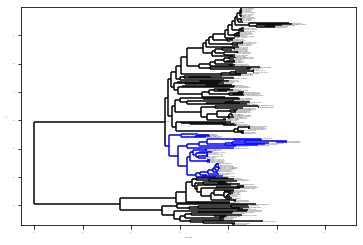

In [17]:
# Строим дерево, выделяя фрагмент цветом.
tree1.clade[0, 1].color = "blue"
matplotlib.rc('font', size=1)
matplotlib.pyplot.figure(figsize=(24,12))
Phylo.draw(tree1, do_show = False)
matplotlib.pyplot.savefig("py_tree1_phylo_blue.png", dpi=600);

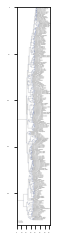

In [36]:
# Снова качаем дерево и рендерим в PDF библиотекой ete3.
raw_tree = requests.get('https://www.jasondavies.com/tree-of-life/life.txt').text
tree2 = Tree(raw_tree, format=1)


tree2.render("py_tree2_ete3.png");
matplotlib.pyplot.imshow(matplotlib.pyplot.imread("py_tree2_ete3.png"));

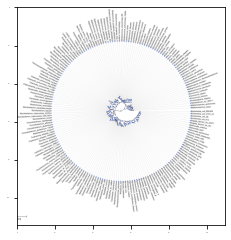

In [37]:
# Рендерим в круговом лейауте.
circular_style = TreeStyle()
circular_style.mode = "c"
circular_style.scale = 20
tree2.render("py_tree2_ete3_circ.png", tree_style=circular_style);
matplotlib.pyplot.imshow(matplotlib.pyplot.imread("py_tree2_ete3_circ.png"));

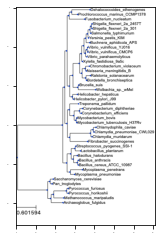

In [38]:
# Рендерим, удалив 42 случайных листа.
ss = random.sample(tree2.get_leaf_names(), 42)
tree2.prune(ss)
tree2.render("py_tree2_ete3_random.png");
matplotlib.pyplot.imshow(matplotlib.pyplot.imread("py_tree2_ete3_random.png"));

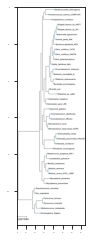

In [39]:
# Рендерим с более тщательно настроенным стилем.
ts = TreeStyle()
ts.branch_vertical_margin = 15

nstyle = NodeStyle()
nstyle["shape"] = "square"
nstyle["size"] = 5 
nstyle["fgcolor"] = "lightblue"
for leaf in tree2.traverse(): 
   leaf.set_style(nstyle)

tree2.render("py_tree2_ete3_random_improved.png", tree_style=ts)
matplotlib.pyplot.imshow(matplotlib.pyplot.imread("py_tree2_ete3_random_improved.png"));